26734
2899
Before SD 2304
After SD 2283
3.22284159484861 2.919182753456736
7.3496152105882295 2.6900198795516133
2.389445300167984 2.923306760964219
6.765517953185503 3.6745621383854834
6.677190306940771 3.7572162430885743


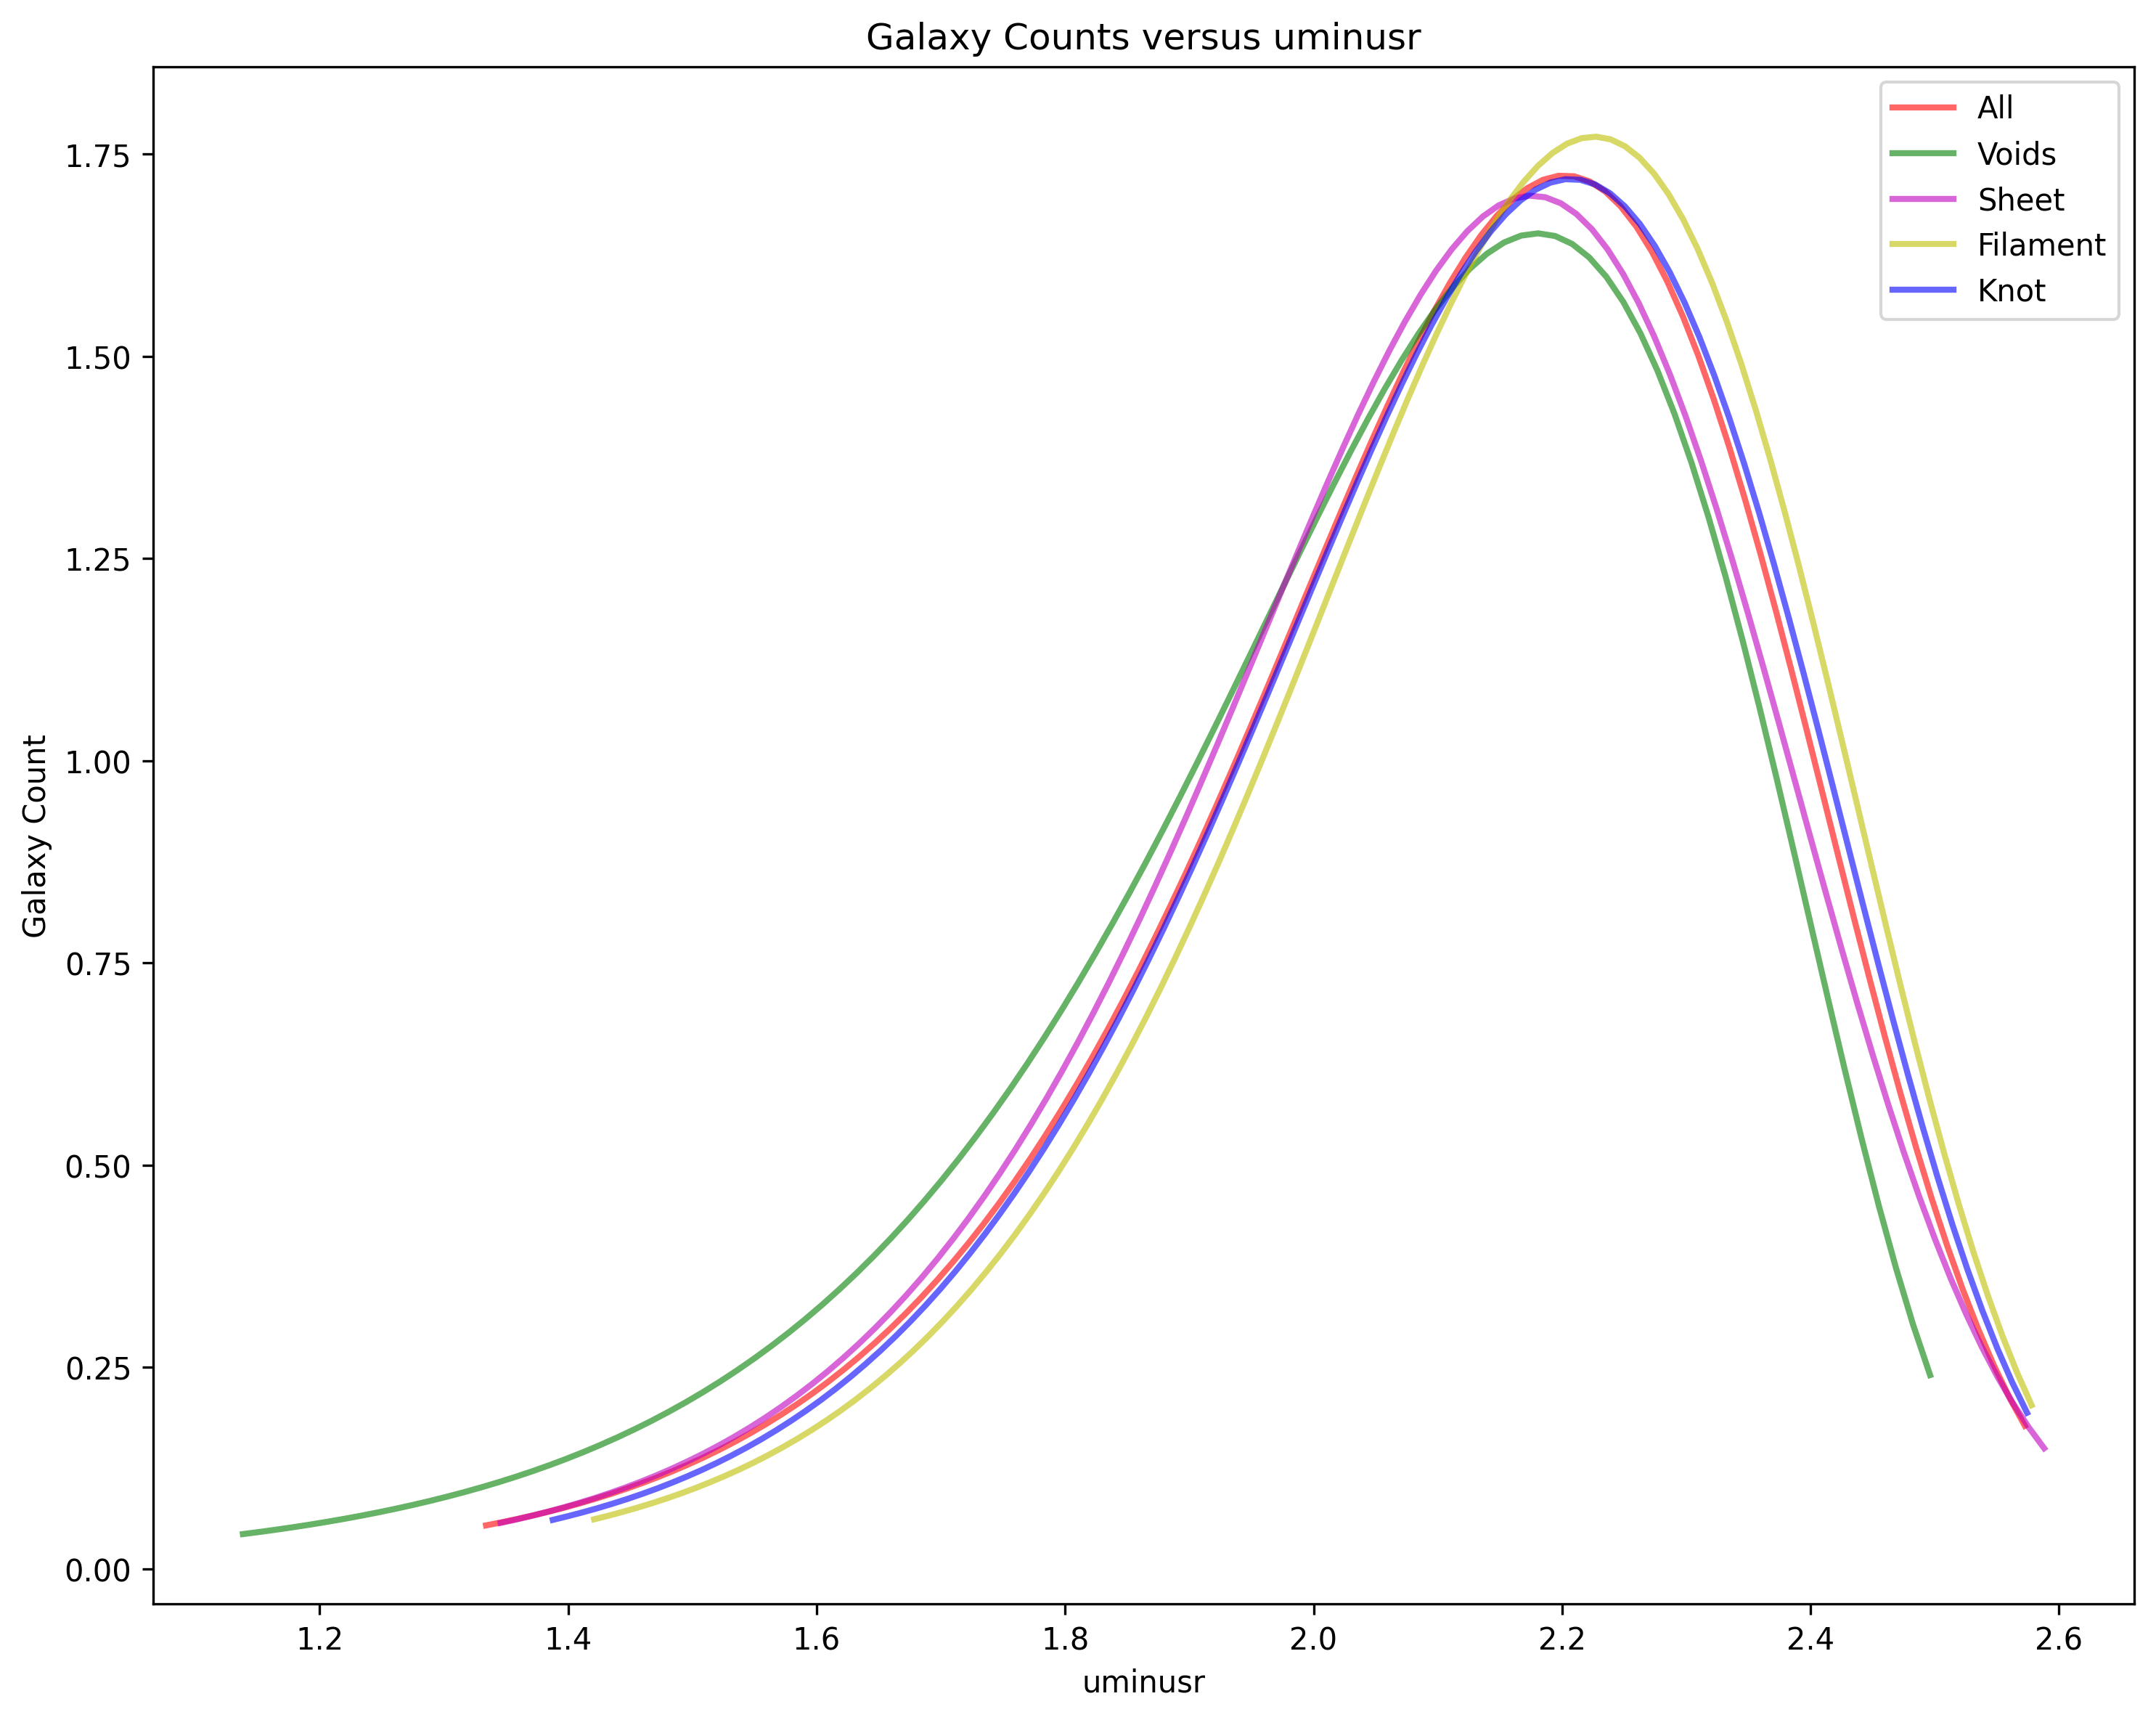

13.146030348353765 9.370058881430765
14.56402694974647 9.091117021838954
-2392.313650582746 3075.5154389718937
15.20734907447913 9.244675228152683
-3038.3238854609185 3247.6744170234506


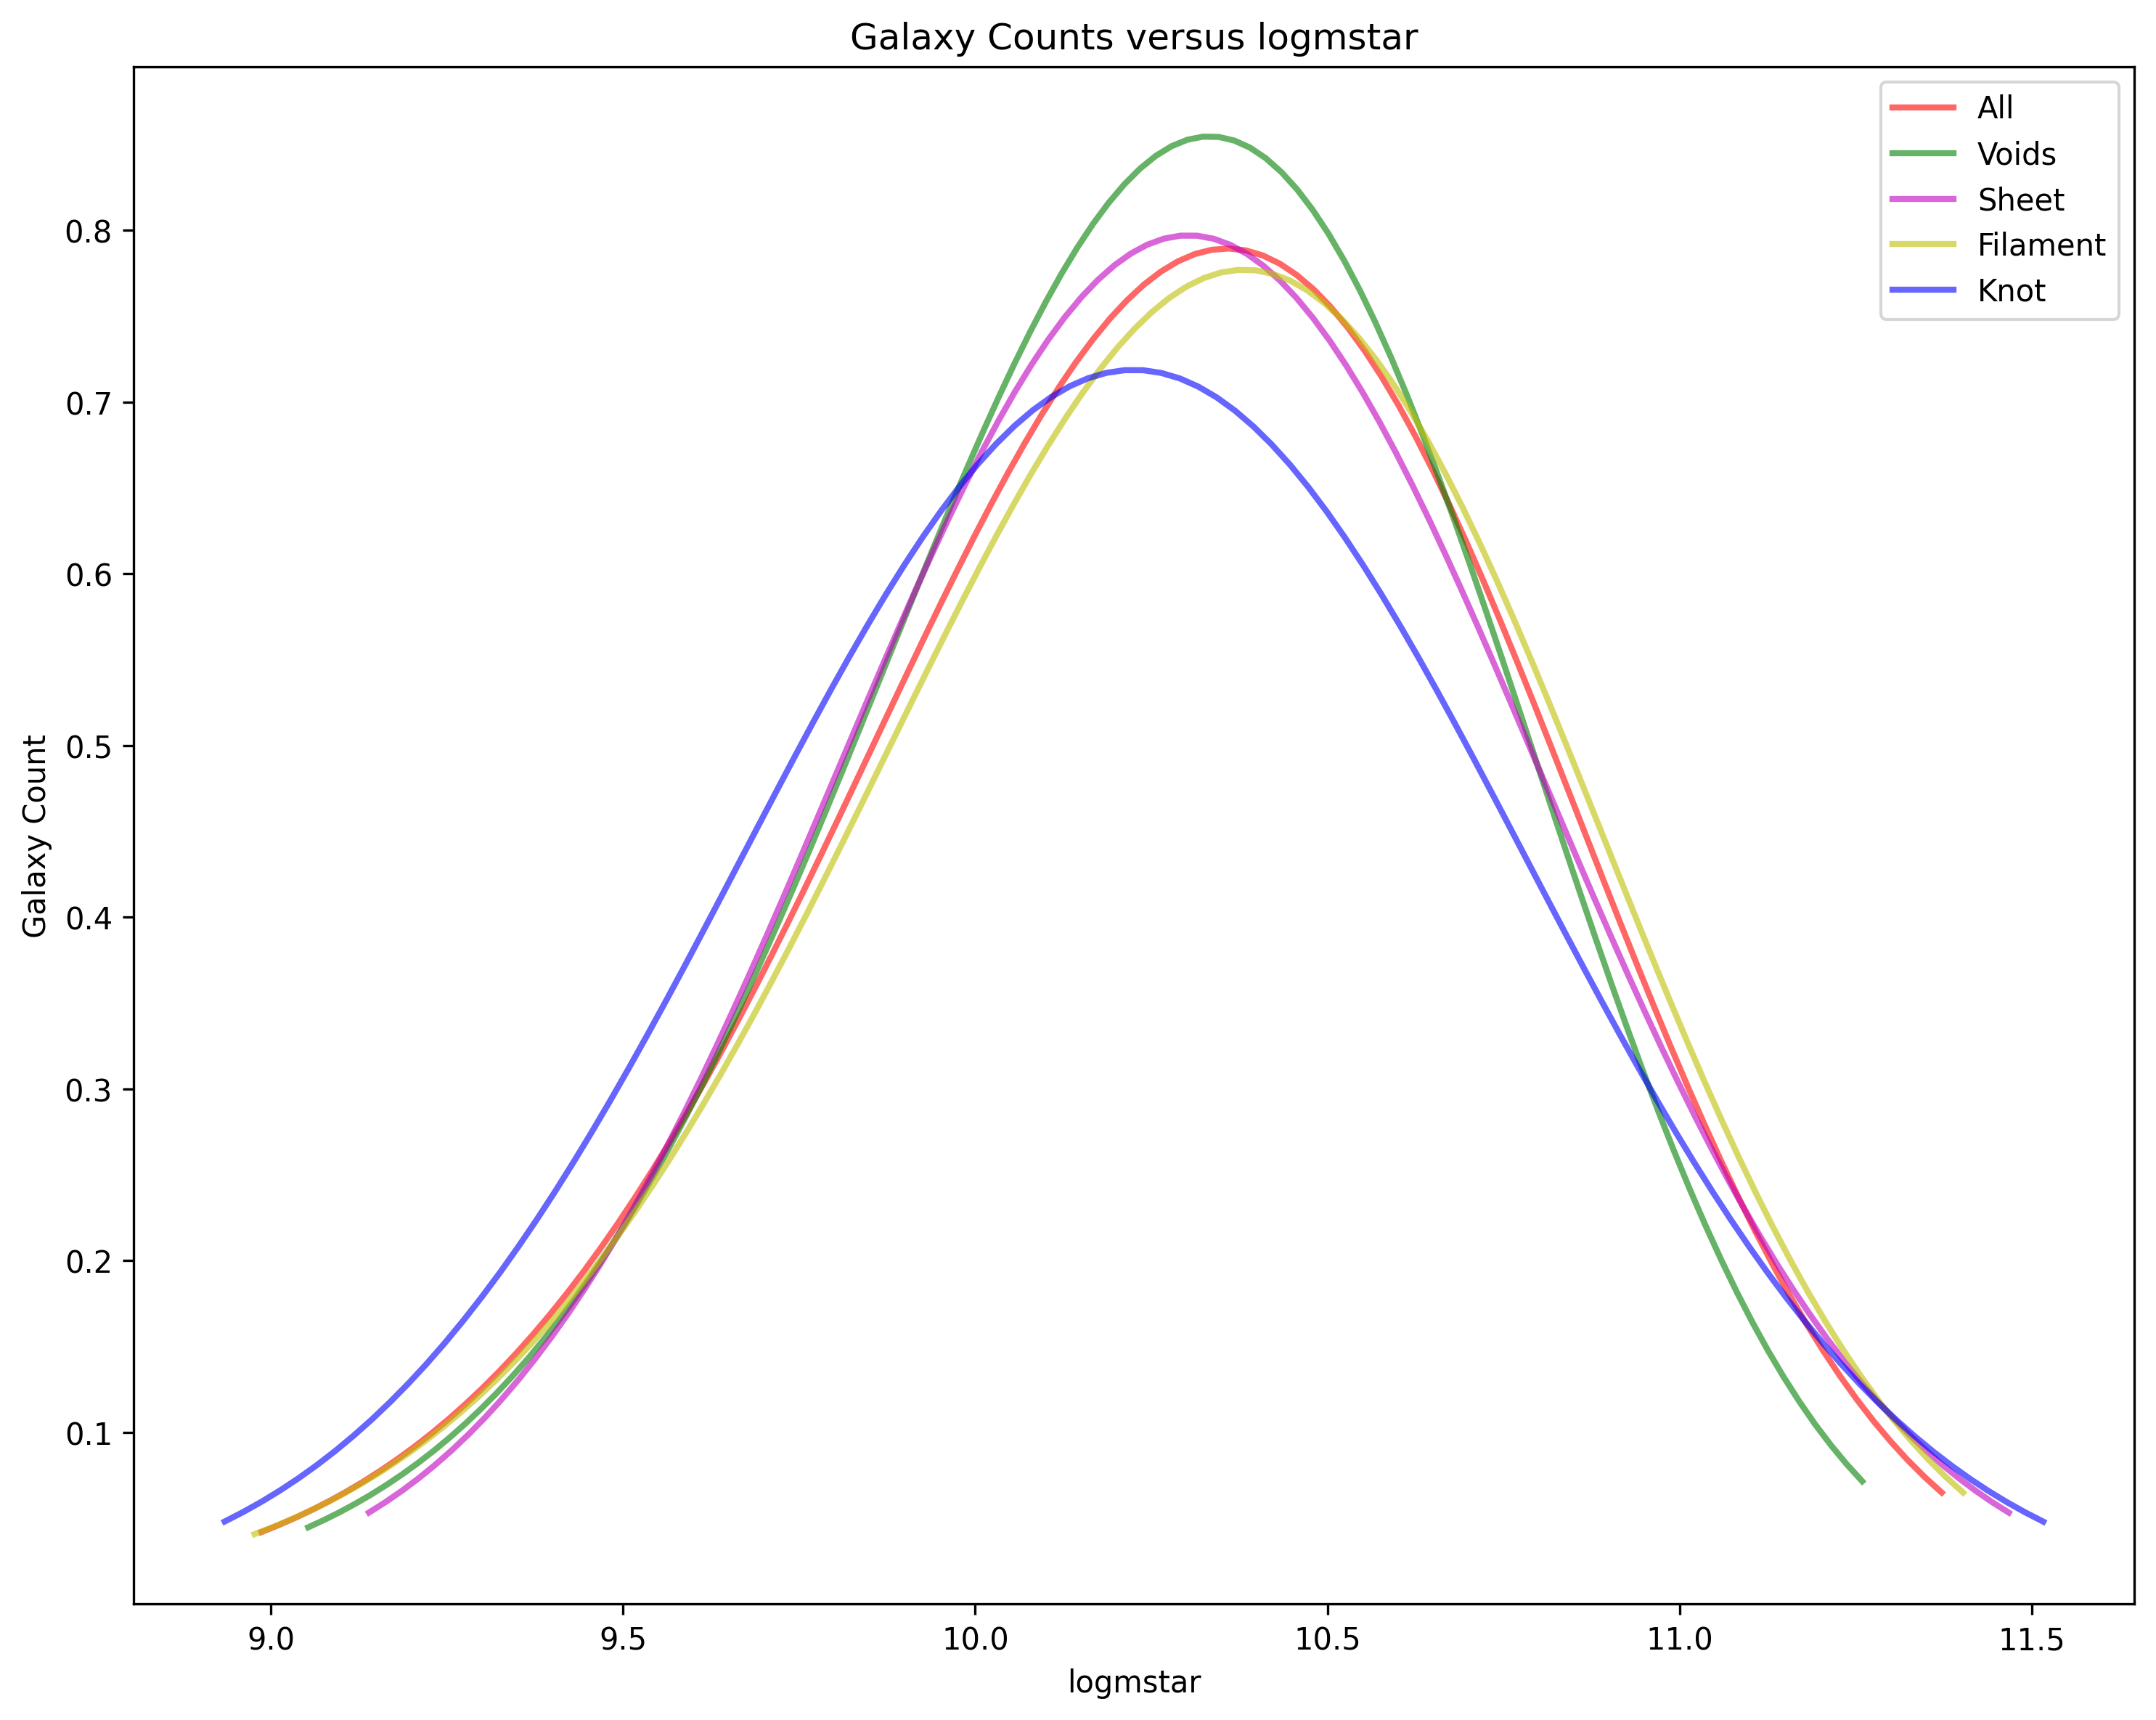

-1.0301630807718016 1.6877649314071372
-1.429445054320918 1.832879232457711
-1.1035919226238557 1.7491278125702685
-0.8090446172250443 1.5219392333615607
-2.062053562690683 2.4982663156755835


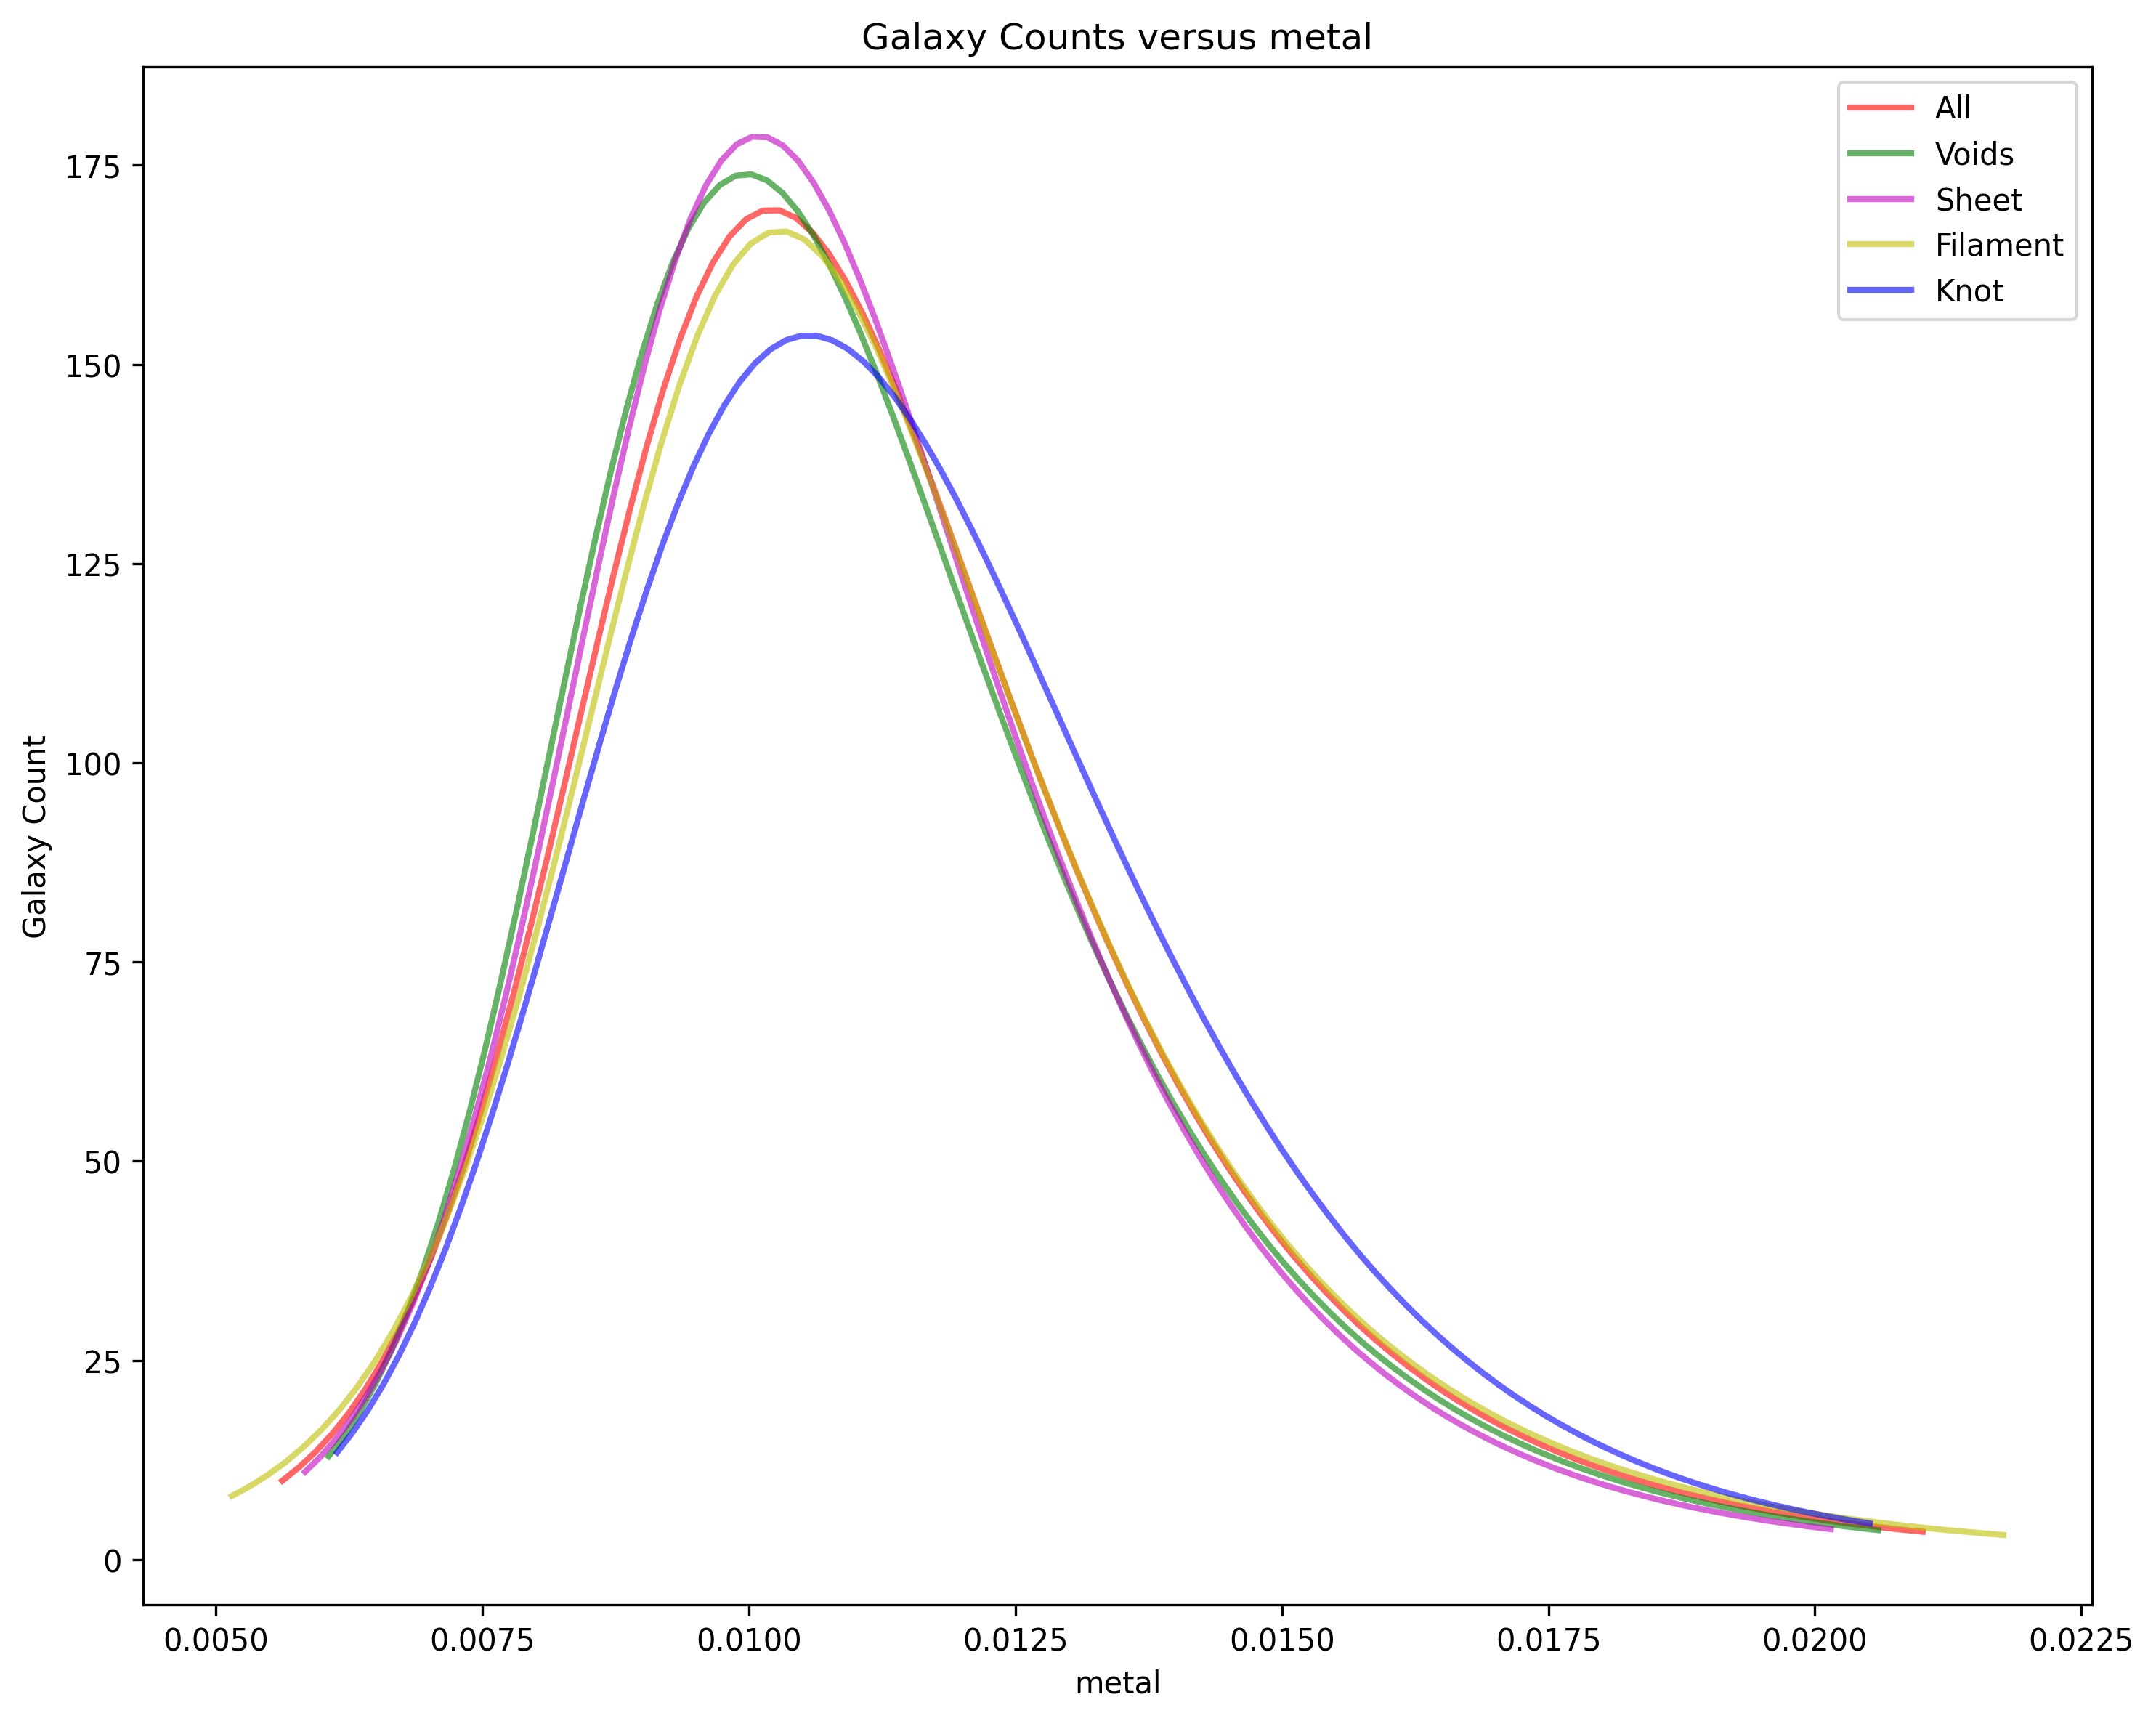

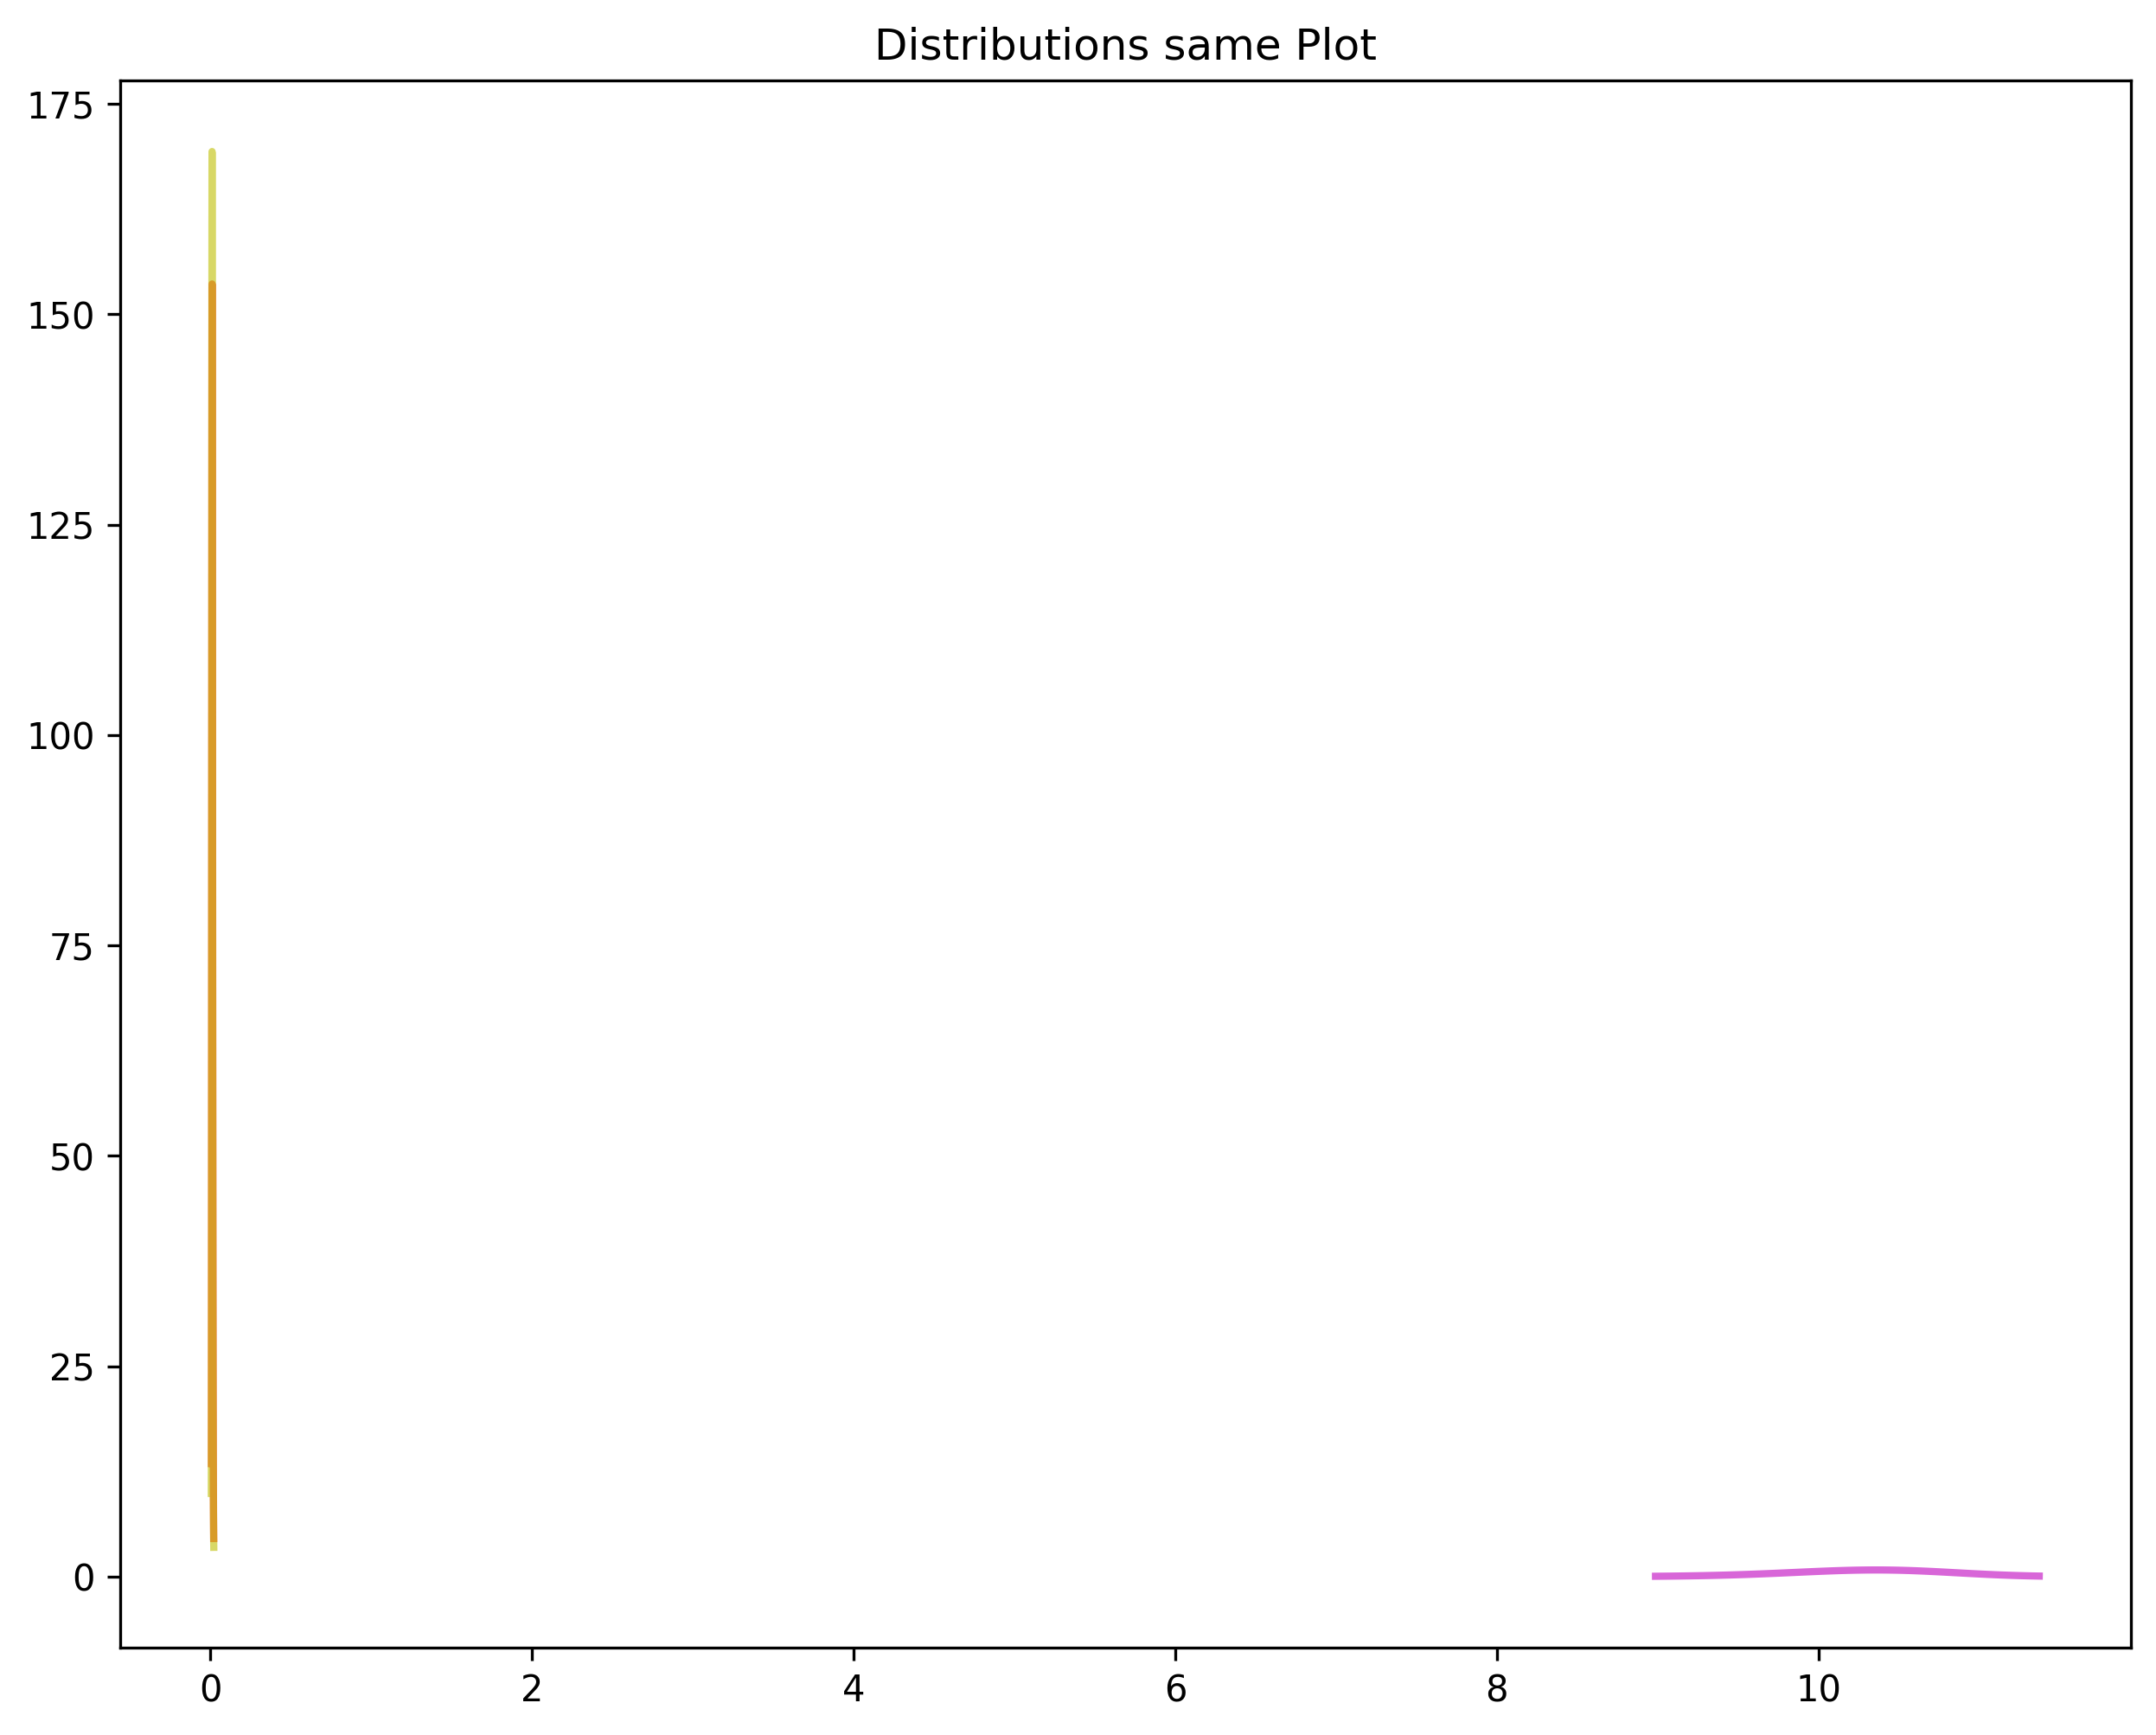

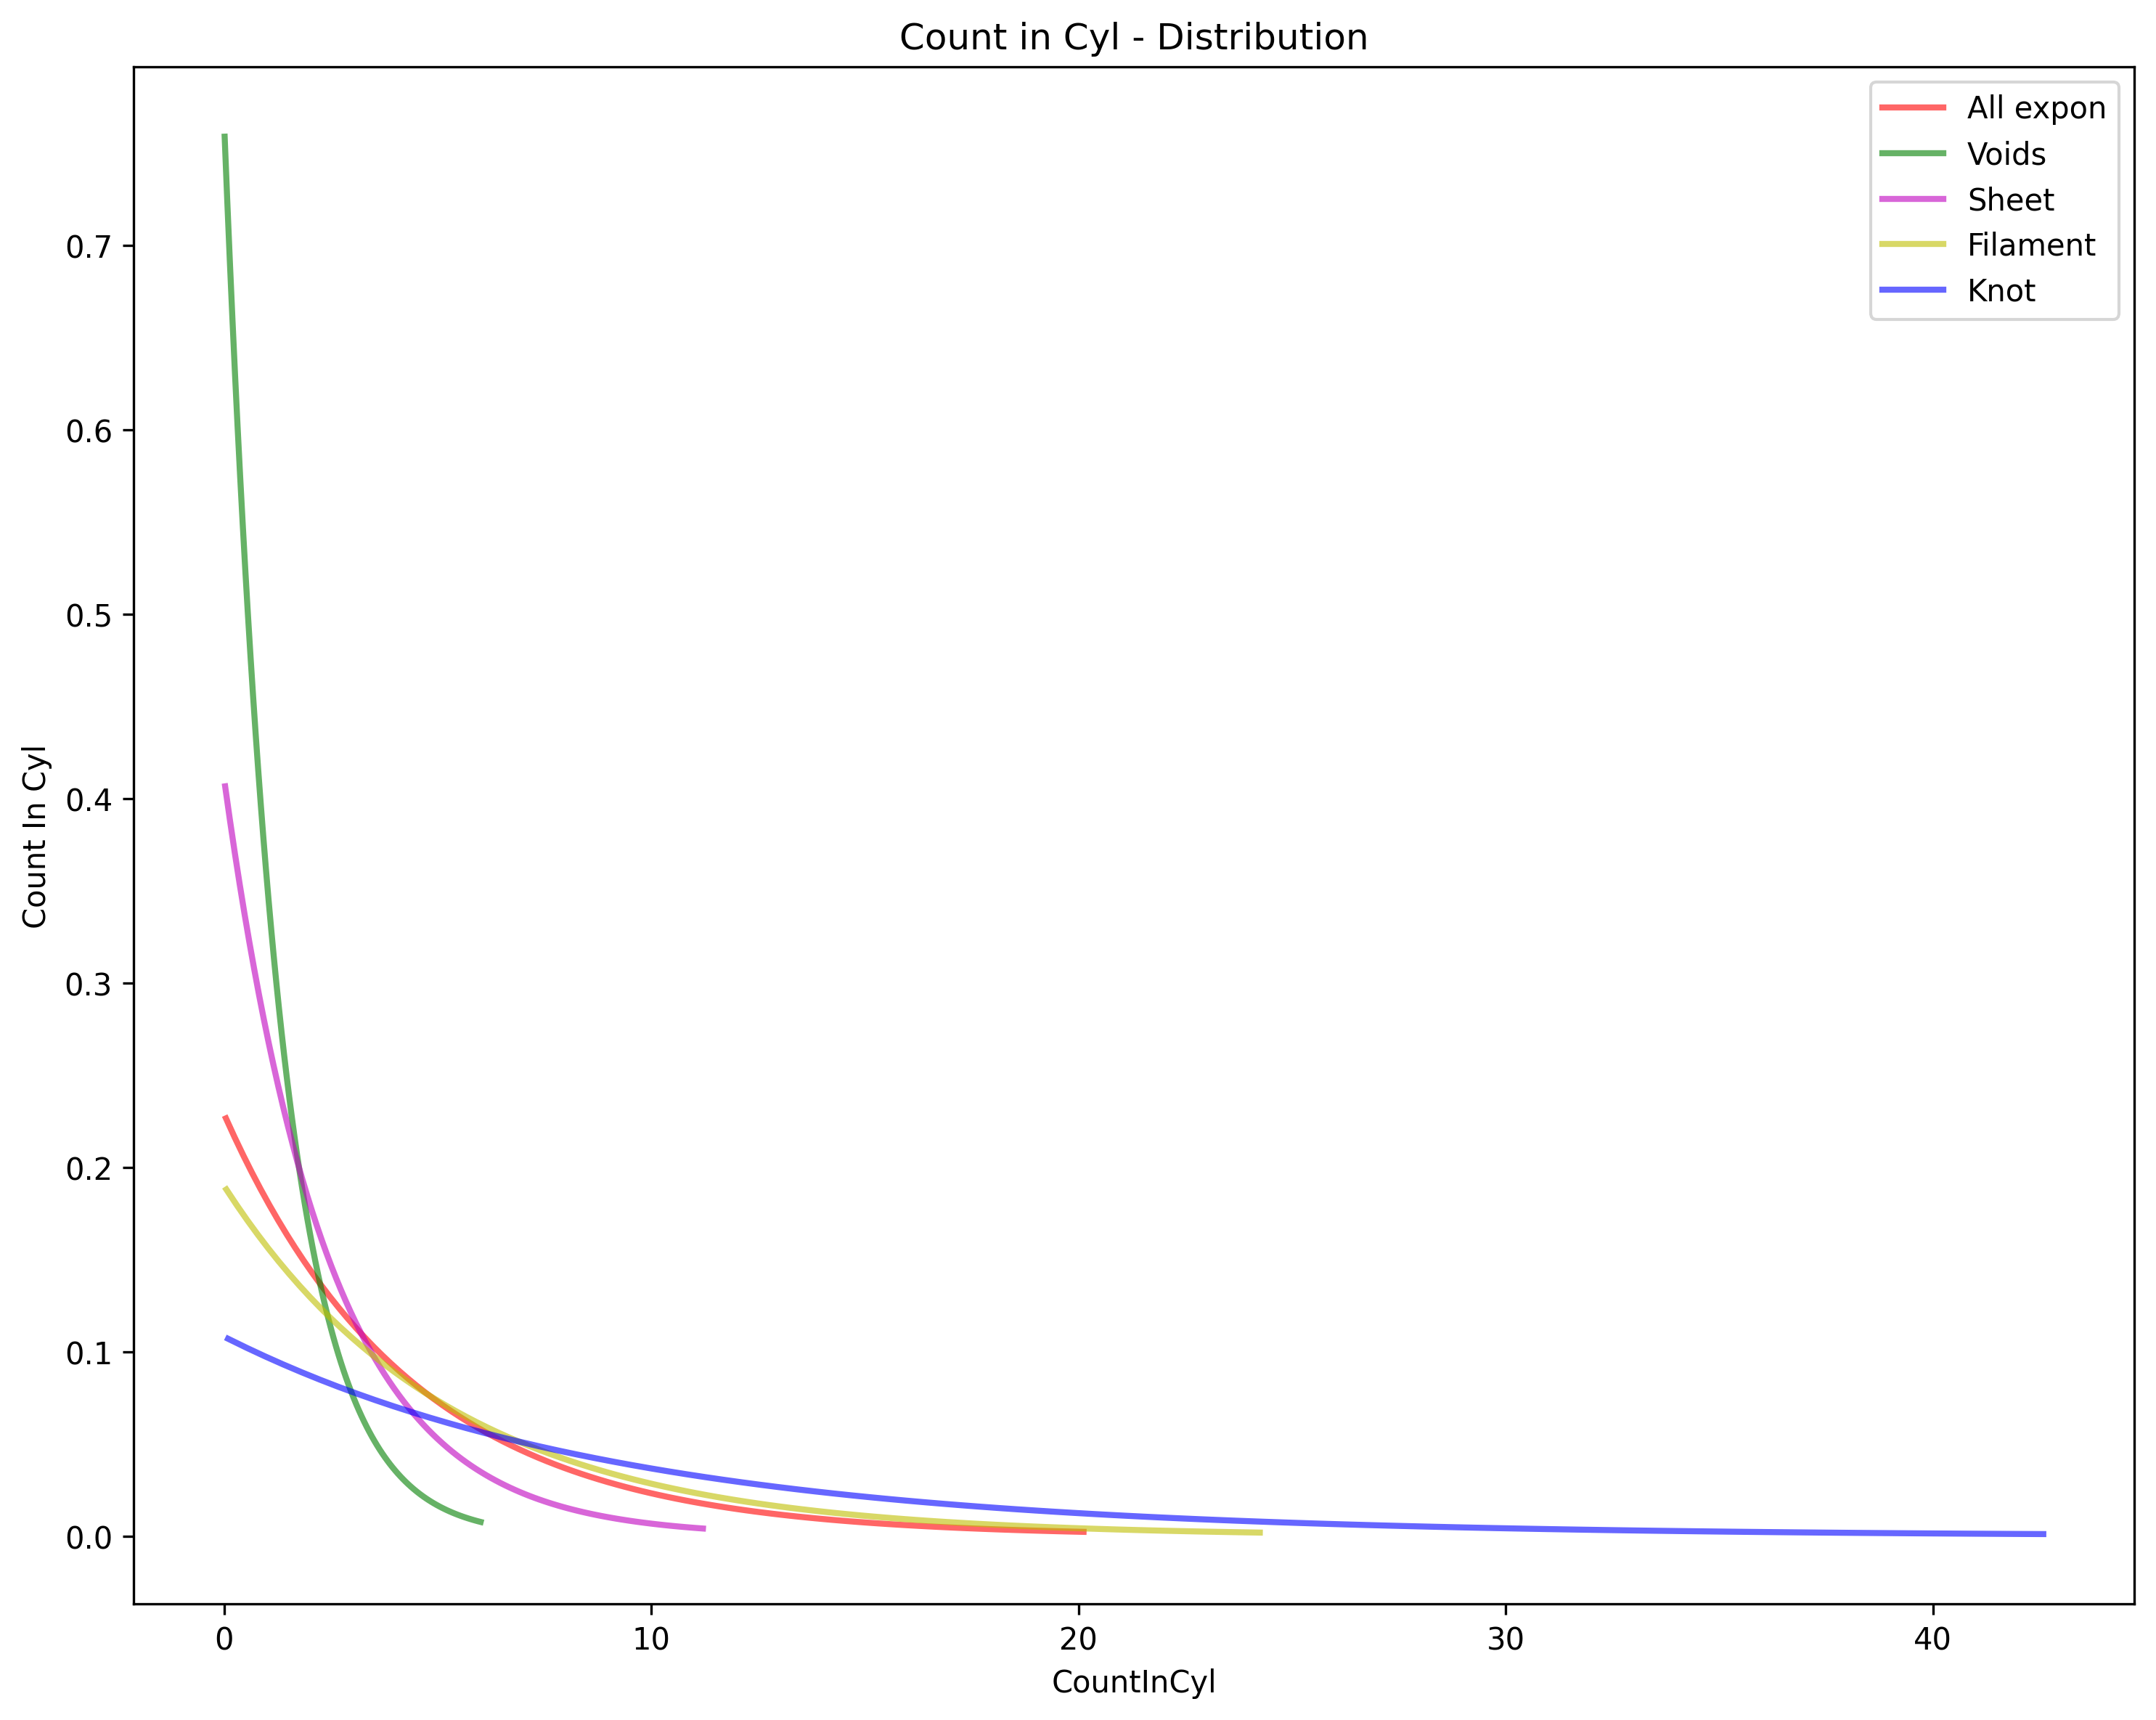

1.349843853859824 0.18377430374337525 1.251909468442456
6.999837171638445 -1.0526102457315716 0.6198170118991718
4.643203378144029 -0.4978130419963471 0.5930003937635282
1.4326418032724035 0.19102530430623685 0.8312183958250359
1.6458516859142622 0.17355397915607462 0.4433418258625018


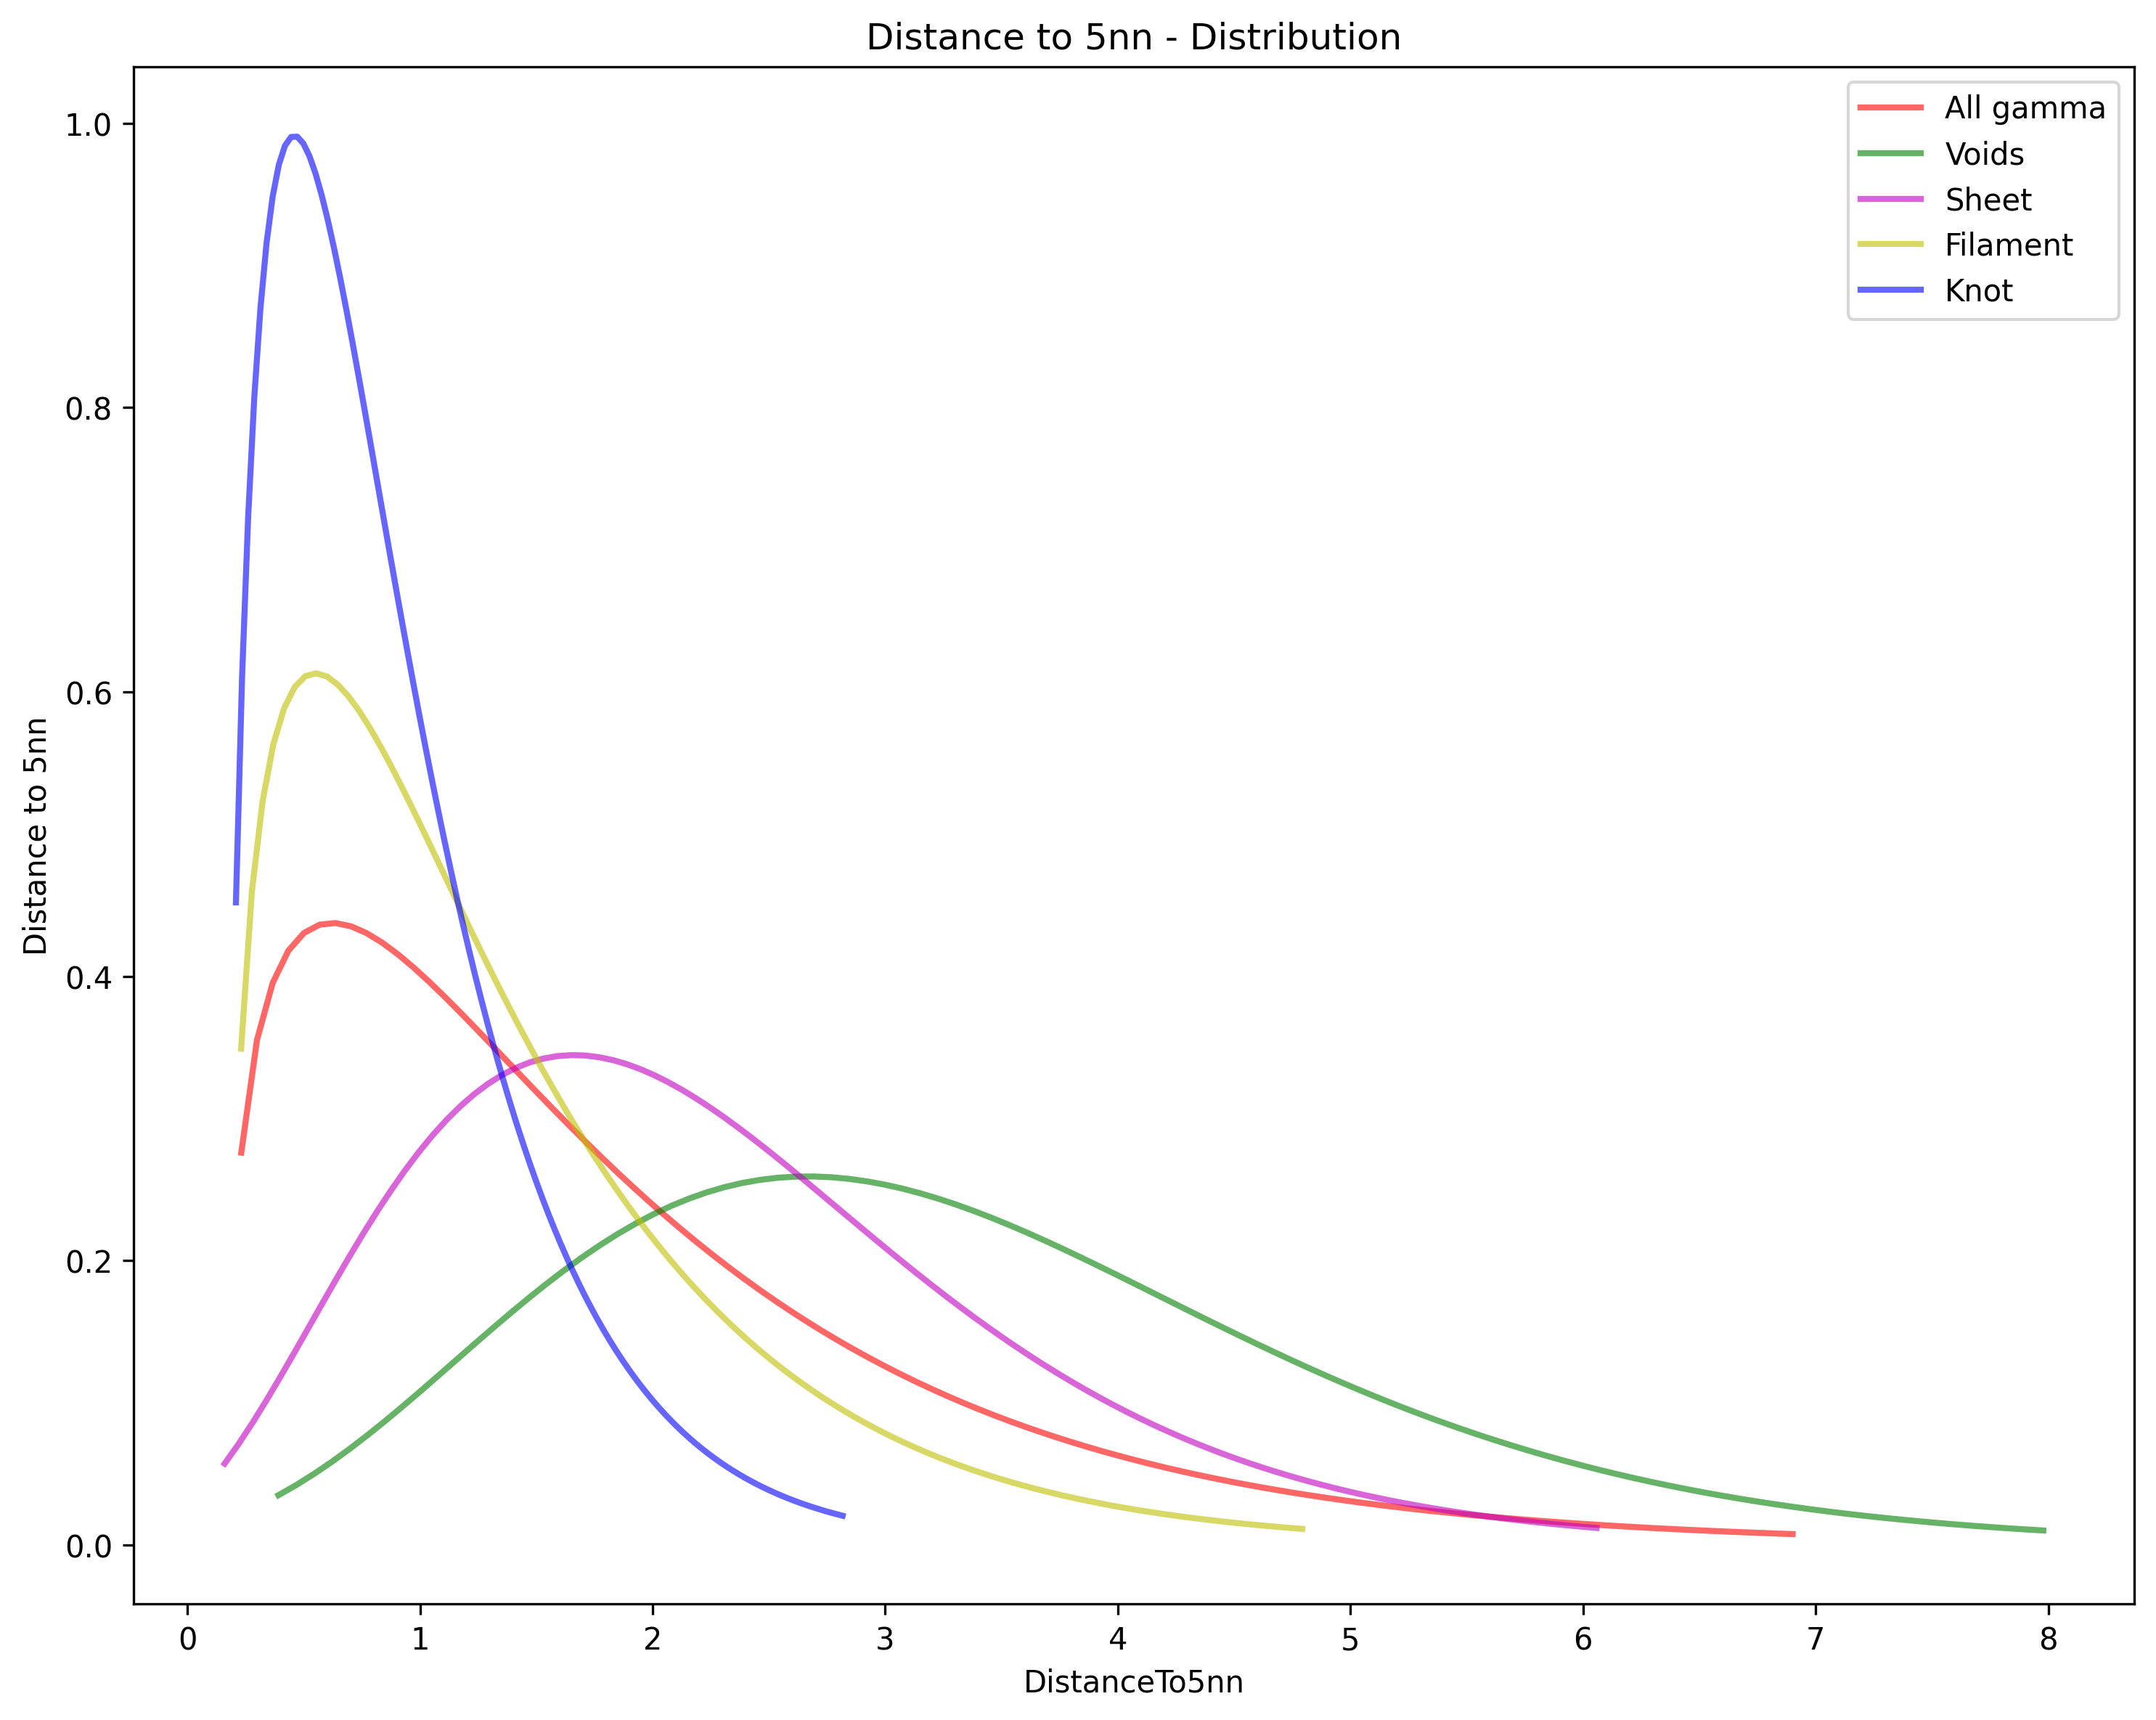

Max : 9.752
Min : 0.003
Max : 49.838
Min : 0.016
MAx : 5.312
pareto 2.2391346325207966 -0.47158087382524205 0.48758085778231763


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


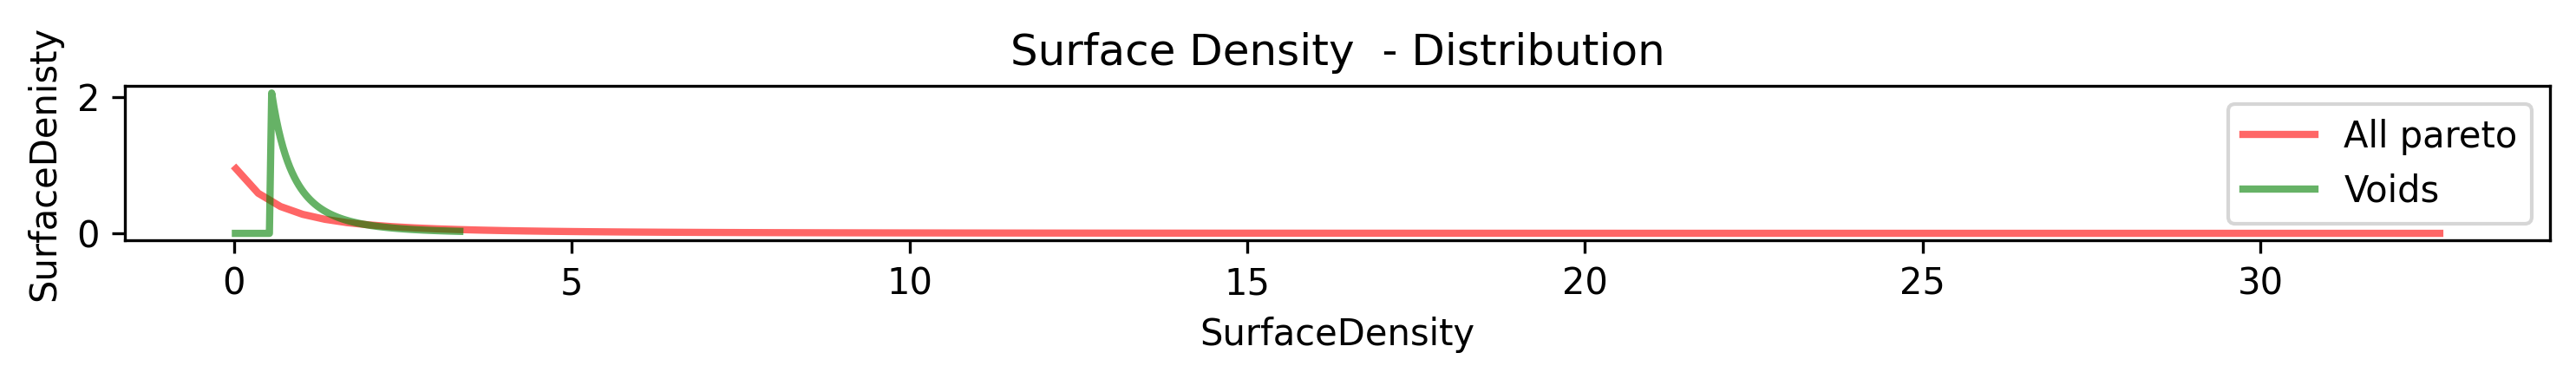

Max : 35.692
Min : 0.0
MAx : 10.0
pareto 1.4481929518015402 -0.6618010518357424 0.661801022667482


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


KeyError: 'Distanceto5nn'

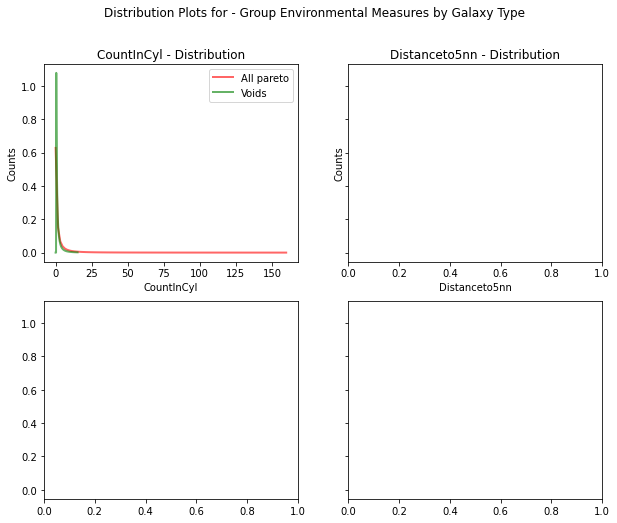

In [9]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot

#print(RawMassEClassEmeasure.colnames)
# CLEAN DATA
RErange = Table.read('../../GAMA_Data/VisualMassClassEnviron.fits')
print(len(RErange))
RErange = RErange[RErange['ELLIPTICAL_CODE'] == 1]
print(len(RErange))
RErange = RErange[RErange['SurfaceDensityFlag'] == 0]
#RErange = RErange[RErange['DistanceTo5nnFlag'] == 0]
print('Before SD '+str(len(RErange)))
RErange = RErange[RErange['SurfaceDensity'] < 50]
print('After SD '+str(len(RErange)))
RErange = RErange[RErange['AGEDenParFlag'] == 0]
RErange = RErange[RErange['CountInCylFlag'] == 0]
RErange = RErange[RErange['uminusr']> 0.001]
RErange = RErange[RErange['metal']> 0.001]

binCount = 80
alphaVal = .3

types = [(0,'Voids'),(1,'Sheet'),(2,'Filament'),(3,'Knot')]
cols = ['g-','m-','y-','b-']
    

##### uminusr
fig = plt.figure(figsize=(10, 8), dpi=300)

#fig.suptitle('Plot - Histogram Red Galaxies for Elliptical Galaxies')
#fig.legend(loc="upper right")
#import scipy.stats as stats
from scipy import stats
xfield = 'uminusr'
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#print(counts)

ax1 = fig.add_subplot(1, 1, 1)
ax1.title.set_text('Galaxy Counts versus uminusr')
ax1.set_ylabel('Galaxy Count')
ax1.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

aj, bj, cj, dj =stats.johnsonsu.fit(RErange[xfield])
print(aj, bj)
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)

ax1.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='All')
for t in types :
    subrange = RErange[RErange['GeoS4'] == t[0]]
    aj, bj, cj, dj =stats.johnsonsu.fit(subrange[xfield])
    print(aj, bj)
    xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
    xj = np.linspace(xj0,xj1,100)

    ax1.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),cols[t[0]], lw=2, alpha=0.6, label=t[1])

#ax1.set_xlabel(xfield)
ax1.set_xlabel('uminusr')
ax1.legend()


fig.tight_layout()
fig.savefig('../../ChartsPlots/GalaxyTypes-uminusr.png', dpi=300, bbox_inches='tight')                      
plt.show()


xfield ='logmstar'
fig = plt.figure(figsize=(10, 8), dpi=300)
ax2 = fig.add_subplot(1, 1, 1)
ax2.title.set_text('Galaxy Counts versus logmstar')
ax2.set_ylabel('Galaxy Count')
ax2.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

alj, blj, clj, dlj =stats.johnsonsu.fit(RErange[xfield].data)
print(alj, blj)
xlj0, xlj1 = stats.johnsonsu.ppf([0.01, 0.99], alj, blj, loc=clj, scale=dlj)
xlj = np.linspace(xlj0,xlj1,100)

ax2.plot(xlj, stats.johnsonsu.pdf(xlj, alj, blj, loc=clj, scale=dlj),'r-', lw=2, alpha=0.6, label='All')
for t in types :
    subrange = RErange[RErange['GeoS4'] == t[0]]
    aj, bj, cj, dj =stats.johnsonsu.fit(subrange[xfield])
    print(aj, bj)
    xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
    xj = np.linspace(xj0,xj1,100)

    ax2.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),cols[t[0]], lw=2, alpha=0.6, label=t[1])

#ax2.set_xlabel(xfield)
ax2.set_xlabel('logmstar')
ax2.legend()
fig.tight_layout()
fig.savefig('../../ChartsPlots/GalaxyTypes-logmstar.png', dpi=300, bbox_inches='tight')                      
plt.show()

xfield ='metal'
fig = plt.figure(figsize=(10, 8), dpi=300)
ax3 = fig.add_subplot(1, 1, 1)
ax3.title.set_text('Galaxy Counts versus metal')
ax3.set_ylabel('Galaxy Count')
ax3.set_xlabel(xfield)

amj, bmj, cmj, dmj =stats.johnsonsu.fit(RErange[xfield].data)
print(amj, bmj)
xmj0, xmj1 = stats.johnsonsu.ppf([0.01, 0.99], amj, bmj, loc=cmj, scale=dmj)
xmj = np.linspace(xmj0,xmj1,100)

ax3.plot(xmj, stats.johnsonsu.pdf(xmj, amj, bmj, loc=cmj, scale=dmj),'r-', lw=2, alpha=0.6, label='All')
for t in types :
    subrange = RErange[RErange['GeoS4'] == t[0]]
    aj, bj, cj, dj =stats.johnsonsu.fit(subrange[xfield])
    print(aj, bj)
    xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
    xj = np.linspace(xj0,xj1,100)

    ax3.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),cols[t[0]], lw=2, alpha=0.6, label=t[1])

#a3.set_xlabel(xfield)
ax3.set_xlabel('metal')
ax3.legend()
fig.tight_layout()
fig.savefig('../../ChartsPlots/GalaxyTypes-metal.png', dpi=300, bbox_inches='tight')                      
plt.show()

fig = plt.figure(figsize=(10, 8), dpi=300)
ax4 = fig.add_subplot(1, 1, 1)
ax4.title.set_text('Distributions same Plot')

ax4.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='uminusr pdf')
ax4.plot(xlj, stats.johnsonsu.pdf(xlj, alj, blj, loc=clj, scale=dlj),'m-', lw=2, alpha=0.6, label='logmstar pdf')
ax4.plot(xmj, stats.johnsonsu.pdf(xmj, amj, bmj, loc=cmj, scale=dmj),'y-', lw=2, alpha=0.6, label='metal pdf')

xfield = 'CountInCyl'
fig = plt.figure(figsize=(10, 8), dpi=300)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#print(counts)
ax5 = fig.add_subplot(1, 1, 1)
ax5.title.set_text('Count in Cyl - Distribution')
ax5.set_ylabel('Count In Cyl')
ax5.set_xlabel(xfield)
#ae, be, ce = stats.expon.fit(RErange1[xfield].data)
ae, be = stats.expon.fit(RErange[xfield].data)
xe0, xe1 = stats.expon.ppf([0.01, 0.99], loc=ae, scale=be)
xe = np.linspace(xe0,xe1,100)

ax5.plot(xe, stats.expon.pdf(xe, loc=ae, scale=be),'r-', lw=2, alpha=0.6, label='All expon')

for t in types :
    subrange = RErange[RErange['GeoS4'] == t[0]]
    ae, be = stats.expon.fit(subrange[xfield].data)
    xe0, xe1 = stats.expon.ppf([0.01, 0.99], loc=ae, scale=be)
    xe = np.linspace(xe0,xe1,100)
    ax5.plot(xe, stats.expon.pdf(xe, loc=ae, scale=be),cols[t[0]], lw=2, alpha=0.6, label=t[1])

ax5.legend()
fig.tight_layout()
fig.savefig('../../ChartsPlots/GalaxyTypes-CountInCyl.png', dpi=300, bbox_inches='tight')                      
plt.show()

xfield = 'DistanceTo5nn'
fig = plt.figure(figsize=(10, 8), dpi=300)
ax6 = fig.add_subplot(1, 1, 1)
ax6.title.set_text('Distance to 5nn - Distribution')
ax6.set_ylabel('Distance to 5nn')
ax6.set_xlabel(xfield)
ag, bg, cg =stats.gamma.fit(RErange[xfield].data)
print(ag, bg, cg)
xg0, xg1 = stats.gamma.ppf([0.01, 0.99], ag, loc=bg, scale=cg)
xg = np.linspace(xg0,xg1, 100)
#ax6.hist(RErange[xfield].data, bins=binCount, density=True)
ax6.plot(xg, stats.gamma.pdf(xg, ag, loc=bg, scale = cg),'r-', lw=2, alpha=0.6, label='All gamma')
for t in types :
    subrange = RErange[RErange['GeoS4'] == t[0]]
    ag, bg, cg =stats.gamma.fit(subrange[xfield])
    print(ag, bg, cg)
    xg0, xg1 = stats.gamma.ppf([0.01, 0.99], ag, loc=bg, scale=cg)
    xg = np.linspace(xg0,xg1, 100)
    ax6.plot(xg, stats.gamma.pdf(xg, ag, loc=bg, scale = cg),cols[t[0]], lw=2, alpha=0.6, label=t[1])
ax6.legend()
fig.tight_layout()
fig.savefig('../../ChartsPlots/GalaxyTypes-DistanceTo5nn.png', dpi=300, bbox_inches='tight')                      
plt.show()

xfield = 'AGEDenPar'
ax7 = fig.add_subplot(8, 1, 7)
ax7.title.set_text('AgeDenPar  - Distribution')
ax7.set_ylabel('AgeDenPar')
ax7.set_xlabel(xfield)
print('Max : '+str(max(RErange[xfield])))
print('Min : '+str(min(RErange[xfield])))

aae, bae = stats.expon.fit(RErange[xfield].data)
xae0, xae1 = stats.expon.ppf([0.01, 0.99], loc=aae, scale=bae)
xae = np.linspace(xae0,xae1,100)

ax7.plot(xae, stats.expon.pdf(xae, loc=aae, scale=bae),'r-', lw=2, alpha=0.6, label='All expon')

types = [(0,'Voids'),(1,'Sheet'),(2,'Filament'),(3,'Knot')]
types = [(0,'Voids')]

for t in types :
    subrange = RErange[RErange['GeoS4'] == t[0]]
    ae, be = stats.expon.fit(subrange[xfield].data)
    xe0, xe1 = stats.expon.ppf([0.01, 0.99], loc=ae, scale=be)
    xe = np.linspace(xe0,xe1,100)
    ax7.plot(xe, stats.expon.pdf(xe, loc=ae, scale=be),cols[t[0]], lw=2, alpha=0.6, label=t[1])

ax7.legend()
fig.tight_layout()
fig.savefig('../../ChartsPlots/GalaxyTypes-AGEDenPar.png', dpi=300, bbox_inches='tight')                      
plt.show()

xfield = 'SurfaceDensity'
fig = plt.figure(figsize=(10, 8), dpi=300)
ax8 = fig.add_subplot(8, 1, 8)
ax8.title.set_text('Surface Density  - Distribution')
ax8.set_ylabel('SurfaceDenisty')
ax8.set_xlabel(xfield)
print('Max : '+str(max(RErange[xfield])))
print('Min : '+str(min(RErange[xfield])))


#v = stats.pareto.fit(RErange1[xfield].data)
#print(len(v))
asp, bsp, csp = stats.pareto.fit(RErange[xfield].data)
xsp0, xsp1 = stats.pareto.ppf([0.01, 0.99], asp, loc=bsp, scale=csp)
xsp = np.linspace(xsp0,xsp1,100)

ax8.plot(xsp, stats.pareto.pdf(xsp, asp, loc=bsp, scale=csp),'r-', lw=2, alpha=0.6, label='All pareto')
#ax8.plot(xag, stats.gamma.pdf(xs, aas, loc=bs, scale = cs),'r-', lw=2, alpha=0.6, label='gamma pdf')
for t in types :
    subrange = RErange[RErange['GeoS4'] == t[0]]
    print('MAx : '+str(max(subrange[xfield].data)))
    asp, bsp, csp = stats.pareto.fit(subrange[xfield].data)
    print('pareto '+str(asp)+' '+str(bsp)+' '+str(csp))
    xsp0, xsp1 = stats.pareto.ppf([0.01, 0.99], asp, loc=bsp, scale=csp)
    xsp = np.linspace(xsp0,xsp1,100)
    if t[0] <= 2 :
       #ax8.plot(xsp, stats.pareto.pdf(xsp, asp, loc=bsp, scale=csp),cols[t[0]], lw=2, alpha=0.6, label=t[1])
       ax8.plot(xsp, stats.pareto.pdf(xsp, asp, loc=bsp, scale=1),cols[t[0]], lw=2, alpha=0.6, label=t[1])

ax8.legend()
fig.tight_layout()
fig.savefig('../../ChartsPlots/GalaxyTypes-SurfaceDensity.png', dpi=300, bbox_inches='tight')                      
plt.show()

xfields = ['CountInCyl','Distanceto5nn','AGEDenPar','SurfaceDensity']
fig, axes = plt.subplots(2,2,figsize=(10, 8), sharey=True) 
fig.suptitle('Distribution Plots for - Group Environmental Measures by Galaxy Type')
i = 0
j = 0
for xfield in xfields :
    axes[i,j].title.set_text(xfield+' - Distribution')
    axes[i,j].set_ylabel('Counts')
    axes[i,j].set_xlabel(xfield)
    print('Max : '+str(max(RErange[xfield])))
    print('Min : '+str(min(RErange[xfield])))

    #v = stats.pareto.fit(RErange1[xfield].data)
    #print(len(v))
    asp, bsp, csp = stats.pareto.fit(RErange[xfield].data)
    xsp0, xsp1 = stats.pareto.ppf([0.01, 0.99], asp, loc=bsp, scale=csp)
    xsp = np.linspace(xsp0,xsp1,100)

    axes[i,j].plot(xsp, stats.pareto.pdf(xsp, asp, loc=bsp, scale=csp),'r-', lw=2, alpha=0.6, label='All pareto')
    #ax8.plot(xag, stats.gamma.pdf(xs, aas, loc=bs, scale = cs),'r-', lw=2, alpha=0.6, label='gamma pdf')
    for t in types :
        subrange = RErange[RErange['GeoS4'] == t[0]]
        print('MAx : '+str(max(subrange[xfield].data)))
        asp, bsp, csp = stats.pareto.fit(subrange[xfield].data)
        print('pareto '+str(asp)+' '+str(bsp)+' '+str(csp))
        xsp0, xsp1 = stats.pareto.ppf([0.01, 0.99], asp, loc=bsp, scale=csp)
        xsp = np.linspace(xsp0,xsp1,100)
        if t[0] <= 2 :
            #ax8.plot(xsp, stats.pareto.pdf(xsp, asp, loc=bsp, scale=csp),cols[t[0]], lw=2, alpha=0.6, label=t[1])
            axes[i,j].plot(xsp, stats.pareto.pdf(xsp, asp, loc=bsp, scale=1),cols[t[0]], lw=2, alpha=0.6, label=t[1])

        axes[i,j].legend()
        j += 1
        if j == 3 :
           i += 1
           j = 0
fig.tight_layout()
fig.savefig('../../ChartsPlots/GalaxyTypes-EnviromentPlots.png', dpi=300, bbox_inches='tight')                      
plt.show()
    


